In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"c22fcf727f5de65b6368e153ddbbef6d"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 27.0MB/s]


In [6]:
!unzip "/content/mobile-price-classification.zip" -d "/content/"

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


# **DATA**

In [7]:
import pandas as pd
train = pd.read_csv("/content/train.csv")
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
y = train["price_range"].values
train_x = train.drop("price_range", axis=1, inplace=False)
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x = sc.fit_transform(train_x)

# **Normal Class**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X , train_y , test_y = train_test_split(train_x , y , test_size = 0.2, random_state = 42)
print(train_X.shape)
print(test_X.shape)

(1600, 20)
(400, 20)


In [13]:
test_y.shape

(400,)

In [14]:
log1 = LogisticRegression(random_state = 42)

log1.fit(train_X , train_y)

pred = log1.predict(test_X)

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


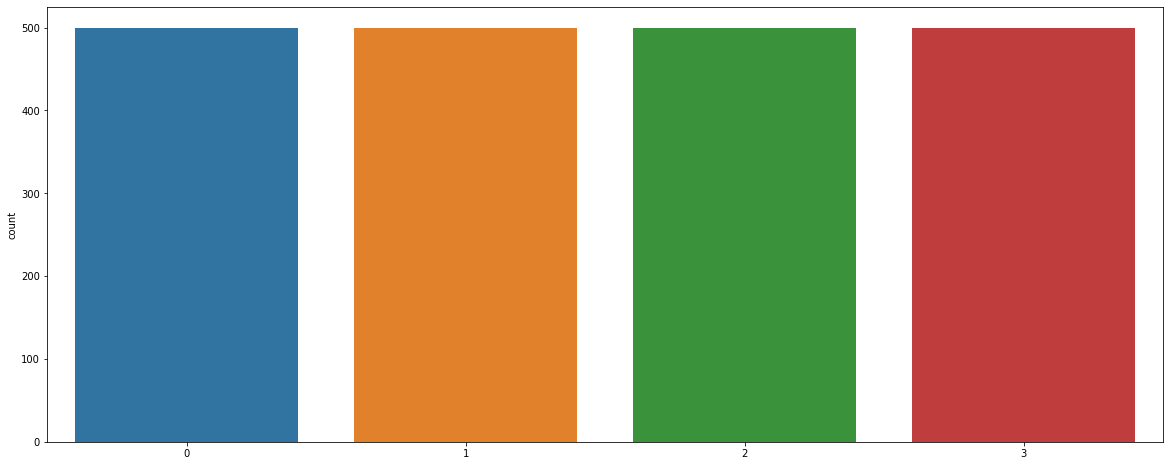

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.countplot(y)

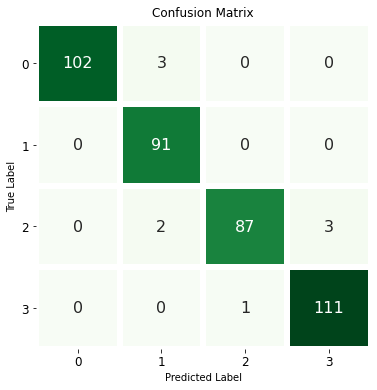

In [16]:
cm = confusion_matrix(test_y, pred)
df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )
f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# **Two Class**

In [17]:
dictionary = {2:1, 3:1}
train_2nd = train.replace({"price_range": dictionary})

In [18]:
y = train_2nd["price_range"].values
train_x = train_2nd.drop("price_range", axis=1, inplace=False)
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [19]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [20]:
train_X, test_X , train_y , test_y = train_test_split(train_x , y , test_size = 0.2, random_state = 42)
print(train_X.shape)
print(test_X.shape)

(1600, 20)
(400, 20)


In [21]:
log2 = LogisticRegression(random_state = 42)

log2.fit(train_X , train_y)

pred = log2.predict(test_X)

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.99      1.00      0.99       295

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



## **UnderSampling**

In [22]:
train_2nd['price_range'].value_counts()

1    1500
0     500
Name: price_range, dtype: int64

In [23]:
class_1, class_0 = train_2nd['price_range'].value_counts()

df_class_1 = train_2nd[train_2nd['price_range'] == 1]
df_class_0 = train_2nd[train_2nd['price_range'] == 0]

Under Sampling:
1    500
0    500
Name: price_range, dtype: int64


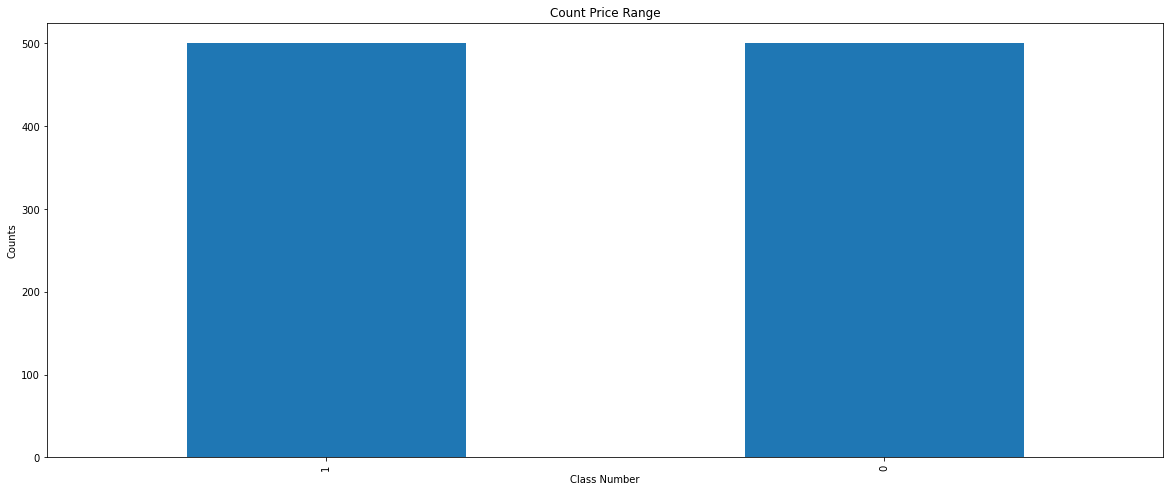

In [24]:
df_0_undersample = df_class_1.sample(class_0, replace=True)
train_3rd = pd.concat([df_0_undersample, df_class_0], axis=0)

print('Under Sampling:')
print(train_3rd['price_range'].value_counts())

plt.figure(figsize=(20,8))
train_3rd.price_range.value_counts().plot(kind='bar', title='Count Price Range', xlabel='Class Number', ylabel='Counts');

In [25]:
train_3rd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
321,1980,0,0.5,1,2,1,29,0.8,177,1,13,312,1910,3865,12,10,18,1,0,0,1
1832,897,0,1.4,1,1,0,17,0.4,171,1,2,547,1852,2948,12,3,5,0,0,1,1
1215,1898,0,1.8,1,3,1,56,0.2,185,7,4,444,739,2114,10,5,19,1,1,1,1
427,1755,1,1.3,0,0,1,24,0.1,134,7,2,286,1075,3937,8,1,7,1,0,1,1
1500,1225,0,0.7,1,6,0,60,0.1,107,2,15,10,1567,2423,17,11,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,15,591,724,1424,15,12,7,1,1,0,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0


In [26]:
y = train_3rd["price_range"].values
train_x = train_3rd.drop("price_range", axis=1, inplace=False)
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
321,1980,0,0.5,1,2,1,29,0.8,177,1,13,312,1910,3865,12,10,18,1,0,0
1832,897,0,1.4,1,1,0,17,0.4,171,1,2,547,1852,2948,12,3,5,0,0,1
1215,1898,0,1.8,1,3,1,56,0.2,185,7,4,444,739,2114,10,5,19,1,1,1
427,1755,1,1.3,0,0,1,24,0.1,134,7,2,286,1075,3937,8,1,7,1,0,1
1500,1225,0,0.7,1,6,0,60,0.1,107,2,15,10,1567,2423,17,11,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,15,591,724,1424,15,12,7,1,1,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0


In [27]:
train_x = sc.fit_transform(train_x)

In [28]:
train_X, test_X , train_y , test_y = train_test_split(train_x , y , test_size = 0.2, random_state = 42)
print(train_X.shape)
print(test_X.shape)

(800, 20)
(200, 20)


In [29]:
log3 = LogisticRegression(random_state = 42)

log3.fit(train_X , train_y)

pred = log3.predict(test_X)

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       104
           1       1.00      0.96      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# **Forward Selection**

In [30]:
dic = {0:'LOW' ,1:'LOW', 2:'HIGH', 3:'HIGH'}
train_4th = train.replace({"price_range": dic})

In [31]:
y = train_4th["price_range"].values
train_x = train_4th.drop("price_range", axis=1, inplace=False).values
train_x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [32]:
train_x = sc.fit_transform(train_x)

In [33]:
feature_selector = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=8,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [34]:
features = feature_selector.fit(train_x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished

[2021-04-12 18:36:08] Features: 1/8 -- score: 0.9755675[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s finished

[2021-04-12 18:36:09] Features: 2/8 -- score: 0.9878350000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.4s finished

[2021-04-12 18:36:11] Features: 3/8 -- score: 0.996785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapse

In [35]:
features_list = train_4th.columns[list(features.k_feature_idx_)]
features_list

Index(['battery_power', 'blue', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'wifi'],
      dtype='object')

In [36]:
x_frwrd = train_4th[['battery_power', 'blue', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'wifi']].values

y = train_4th["price_range"].values

In [37]:
x_frwrd = sc.fit_transform(x_frwrd)

In [38]:
f_train_X, f_test_X , f_train_y , f_test_y = train_test_split(x_frwrd, y , test_size = 0.2, random_state = 42)
print(f_train_X.shape)
print(f_test_X.shape)

(1600, 8)
(400, 8)


In [39]:
log4 = LogisticRegression(random_state = 42)

log4.fit(f_train_X , f_train_y)

f_pred = log4.predict(f_test_X)

print(classification_report(f_test_y, f_pred))

              precision    recall  f1-score   support

        HIGH       1.00      0.99      1.00       204
         LOW       0.99      1.00      0.99       196

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



# **Backward Selection**

In [40]:
backward_selector = SequentialFeatureSelector(LogisticRegression(n_jobs=-1),
           k_features=8,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [41]:
back_features = backward_selector.fit(train_x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished

[2021-04-12 18:36:45] Features: 19/8 -- score: 0.999545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.7s finished

[2021-04-12 18:36:47] Features: 18/8 -- score: 0.9996349999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.5s finished

[2021-04-12 18:36:49] Features: 17/8 -- score: 0.9996649999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of 

In [42]:
features_list = train_4th.columns[list(back_features.k_feature_idx_)]
features_list

Index(['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'wifi'],
      dtype='object')

In [43]:
x_back = train_4th[['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'wifi']].values

y = train_4th["price_range"].values

In [44]:
b_train_X, b_test_X , b_train_y , b_test_y = train_test_split(x_back, y , test_size = 0.2, random_state = 42)
print(b_train_X.shape)
print(b_test_X.shape)

(1600, 8)
(400, 8)


In [45]:
b_train_X = sc.fit_transform(b_train_X)
b_test_X = sc.transform(b_test_X)

In [46]:
log5 = LogisticRegression(random_state = 42)

log5.fit(b_train_X , b_train_y)

b_pred = log5.predict(b_test_X)

print(classification_report(b_test_y, b_pred))

              precision    recall  f1-score   support

        HIGH       1.00      0.99      1.00       204
         LOW       0.99      1.00      0.99       196

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



# **PCA**

In [47]:
y = train["price_range"].values
train_x = train.drop("price_range", axis=1, inplace=False)
train_x = train_x.values
train_x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [48]:
pca = PCA(n_components = 8)
pca_x = pca.fit_transform(train_x)

In [49]:
pca_x_train , pca_x_test, y_train, y_test = train_test_split(pca_x ,y ,test_size = 0.2, random_state = 42)

In [50]:
pca_x_train = sc.fit_transform(pca_x_train)
pca_x_test = sc.transform(pca_x_test)

In [51]:
log6 = LogisticRegression()

log6.fit(pca_x_train, y_train)

pred = log6.predict(pca_x_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.97      1.00      0.98        91
           2       0.98      0.95      0.96        92
           3       0.97      0.98      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# **K FOLD**

In [52]:
y = train["price_range"].values
train_x = train.drop("price_range", axis=1, inplace=False)
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [53]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [54]:
train_x, test_x , train_y , test_y = train_test_split(train_x , y , test_size = 0.2, random_state = 42)
print(train_x.shape)
print(test_x.shape)

(1600, 20)
(400, 20)


In [55]:
log7 = LogisticRegression(random_state = 42)

log7.fit(train_x , train_y)

pred = log7.predict(test_x)

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [56]:
from sklearn.model_selection import cross_val_score

MSE_5fold = cross_val_score(log7 , train_x, train_y , scoring='neg_mean_squared_error',cv = 5)
MSE_10fold = cross_val_score(log7 , train_x , train_y ,scoring='neg_mean_squared_error', cv = 10)

print(abs(MSE_5fold) , '\n')
print(abs(MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(MSE_5fold)), abs(np.mean(MSE_10fold))))

[0.05     0.05     0.053125 0.065625 0.03125 ] 

[0.09375 0.0125  0.03125 0.05625 0.05    0.03125 0.05625 0.075   0.03125
 0.025  ] 

mean MSE in five_cv_scores is 0.05 and in ten_cv_scores is 0.05


In [57]:
#cross_validation
#accuracy

Acc_5fold = cross_val_score(log7 , train_x, train_y ,cv = 5)
Acc_10fold = cross_val_score(log7 , train_x ,train_y, cv = 10)

print(Acc_5fold , '\n')
print(Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(Acc_5fold) * 100, np.mean(Acc_10fold) * 100) )

[0.95     0.95     0.946875 0.934375 0.96875 ] 

[0.90625 0.9875  0.96875 0.94375 0.95    0.96875 0.94375 0.925   0.96875
 0.975  ] 

mean acuuracy in five_cv_scores is 95.00% and in ten_cv_scores is 95.38%
